## Climate Portfolio Post

### Site Description 
Boulder is a city of about 110,000 people, located just northwest of Denver, Colorado. It is the location of University of Colorado, Boulder. It is also a popular location for outdoor enthusists to make themselves at home, due to its proximity to the flatirons, Rocky Mountain National Park, and other Rocky Mountain gems. I have lived in Boulder for two and a half years at the time of writing. 
Colorado is notourous for having sporatic weather and a lack of seasons, and there is a sort of acceptance to hot days in winter and snow days in summer. Having only moved to Colorado in 2017, I am curious to what the historical data has to say about this. Has it always been like this here or is the wild weather something new?
### Data Citation
This data is sourced from the Global Histroical Climatology Network which is a dataset that collects daily measurments from 90,000 land-based stations worldwide. For this study data was taken from Station USC00050848 in Boulder, Colorado. Observed temperature units are in fairenheit and snowfall is in inches. 

Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - Daily (GHCN-Daily), Version 3. Boulder, CO. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ Accessed: Oct. 29, 2024.
### Methods Overview
Data was downloaded from the above source via API for the entire range of snowfall available. Total snowfall was then summed for each year and plotted against an OLS regression trend line. The OLS regression line provides a general trend of snowfall, to see if it was increasing at all. 
### Results
Trend shows that there has been a slight increase in total snowfall per year in Boulder, Colorado. However, there is likely a better way to organize and analyze the data to make more significant observations, as the total annual snowfall doesn't follow a clear pattern and is sporatic in nature. 
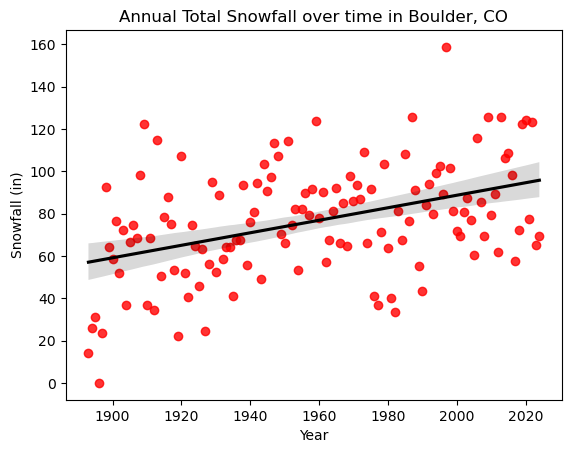
#### Code

In [4]:
# Import packages
import pandas as pd
import holoviews as hv
import hvplot.pandas
# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

In [5]:
boulder_url = ('https://www.ncei.noaa.gov/access/services/data/v1'
           '?dataset=daily-summaries'
           '&dataTypes=TOBS,SNOW'
           '&stations=USC00050848'
           '&units=standard'
           '&startDate=1893-11-01'
           '&endDate=2024-10-26')
boulder_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TOBS,SNOW&stations=USC00050848&units=standard&startDate=1893-11-01&endDate=2024-10-26'

In [6]:
# Download the climate data
climate_df = pd.read_csv(
    boulder_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN'])
climate_df

,STATION,SNOW,TOBS
DATE,,,
1893-11-01,USC00050848,0.0,NaN
1893-11-02,USC00050848,0.0,NaN
1893-11-03,USC00050848,0.0,NaN
1893-11-04,USC00050848,0.0,NaN
1893-11-05,USC00050848,0.0,NaN
...,...,...,...
2024-10-18,USC00050848,0.0,43.0
2024-10-19,USC00050848,0.0,51.0
2024-10-20,USC00050848,0.0,62.0


In [7]:
climate_df = climate_df[['SNOW', 'TOBS']]
climate_df

,SNOW,TOBS
DATE,,
1893-11-01,0.0,NaN
1893-11-02,0.0,NaN
1893-11-03,0.0,NaN
1893-11-04,0.0,NaN
1893-11-05,0.0,NaN
...,...,...
2024-10-18,0.0,43.0
2024-10-19,0.0,51.0
2024-10-20,0.0,62.0


In [8]:
climate_u_df = climate_df.rename(columns={
    'TOBS': 'temp_f',
    'SNOW': 'snowfall_in'
})

climate_u_df

,snowfall_in,temp_f
DATE,,
1893-11-01,0.0,NaN
1893-11-02,0.0,NaN
1893-11-03,0.0,NaN
1893-11-04,0.0,NaN
1893-11-05,0.0,NaN
...,...,...
2024-10-18,0.0,43.0
2024-10-19,0.0,51.0
2024-10-20,0.0,62.0


<Axes: title={'center': 'Daily Snowfall in Boulder, CO'}, xlabel='Date', ylabel='Snowfall (in)'>

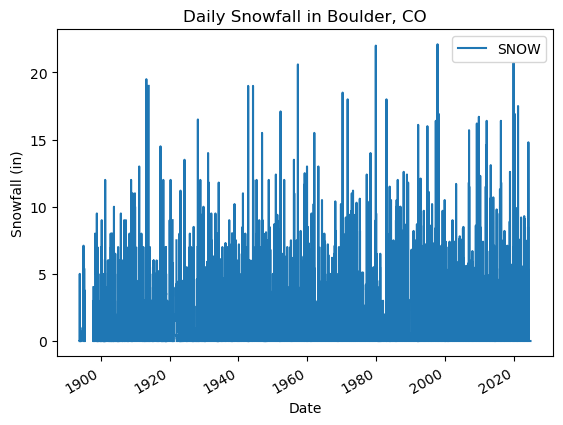

In [9]:
# Plot the data using .plot
climate_df.plot(
    y='SNOW',
    title='Daily Snowfall in Boulder, CO',
    xlabel='Date',
    ylabel='Snowfall (in)')

In [10]:
# Resample
ann_climate_df = climate_df.resample('YS').sum()
ann_climate_df

,SNOW,TOBS
DATE,,
1893-01-01,14.0,0.0
1894-01-01,26.1,0.0
1895-01-01,31.2,0.0
1896-01-01,0.0,0.0
1897-01-01,23.4,0.0
...,...,...
2020-01-01,124.2,20942.0
2021-01-01,77.6,20944.0
2022-01-01,123.1,20491.0


<Axes: title={'center': 'Total Snowfall in Boulder, CO'}, xlabel='Date', ylabel='Snowfall (in)'>

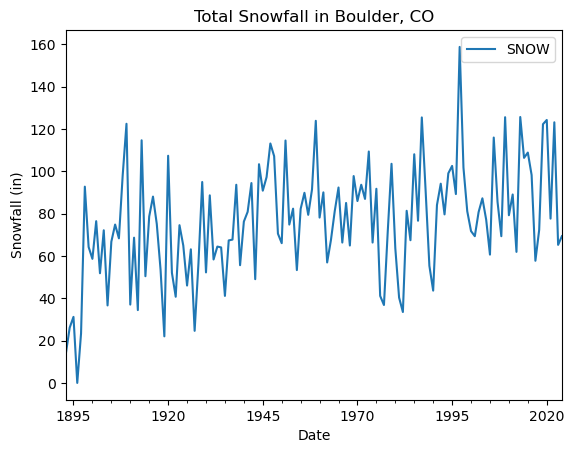

In [11]:
# Plot the data using .plot
ann_climate_df.plot(
    y='SNOW',
    title='Total Snowfall in Boulder, CO',
    xlabel='Date',
    ylabel='Snowfall (in)')

In [12]:
# Fit an OLS Linear Regression to the data
ann_climate_df = ann_climate_df.loc['1893':'2024']

# Drop no data values
observations = ann_climate_df.SNOW.dropna()

# Define the dependent variable and independent variable(s)
features = observations.index.year.values.reshape(-1, 1)
response = observations

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(features, response)

# Calculate and print the metrics
print(f'Slope: {model.coef_[0]} inches per year')

Slope: 0.29546289387591135 inches per year


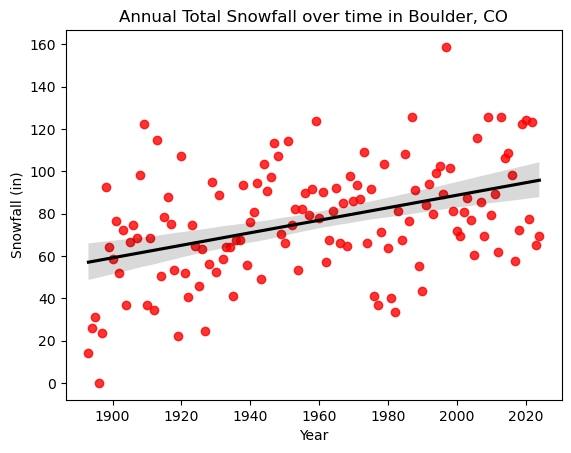

In [13]:
ax = sns.regplot(
    x=ann_climate_df.index.year, 
    y=ann_climate_df.SNOW,
    color='red',
    line_kws={'color': 'black'})
ax.set(
    title='Annual Total Snowfall over time in Boulder, CO',
    xlabel='Year',
    ylabel='Snowfall (in)'
)
plt.show()